In [1]:
import requests
from web3 import Web3
import pandas as pd
import plotly.graph_objects as go

### Oracle - Chainlink

In [5]:
infura_url= 'https://mainnet.infura.io/v3/76210dc3bdfa4e94be8273cb29291eaa'
web3 = Web3(Web3.HTTPProvider(infura_url))

# Print for confirmation to the blockchain
print("Is there an existing connection to the blockchain? : ", web3.is_connected())

Is there an existing connection to the blockchain? :  True


In [23]:
abi = """[{"inputs":[{"internalType":"address","name":"_aggregator","type":"address"},{"internalType":"address","name":"_accessController","type":"address"}],"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"int256","name":"current","type":"int256"},{"indexed":true,"internalType":"uint256","name":"roundId","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"updatedAt","type":"uint256"}],"name":"AnswerUpdated","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"uint256","name":"roundId","type":"uint256"},{"indexed":true,"internalType":"address","name":"startedBy","type":"address"},{"indexed":false,"internalType":"uint256","name":"startedAt","type":"uint256"}],"name":"NewRound","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"from","type":"address"},{"indexed":true,"internalType":"address","name":"to","type":"address"}],"name":"OwnershipTransferRequested","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"from","type":"address"},{"indexed":true,"internalType":"address","name":"to","type":"address"}],"name":"OwnershipTransferred","type":"event"},{"inputs":[],"name":"acceptOwnership","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"accessController","outputs":[{"internalType":"contract AccessControllerInterface","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"aggregator","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_aggregator","type":"address"}],"name":"confirmAggregator","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"decimals","outputs":[{"internalType":"uint8","name":"","type":"uint8"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"description","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"_roundId","type":"uint256"}],"name":"getAnswer","outputs":[{"internalType":"int256","name":"","type":"int256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint80","name":"_roundId","type":"uint80"}],"name":"getRoundData","outputs":[{"internalType":"uint80","name":"roundId","type":"uint80"},{"internalType":"int256","name":"answer","type":"int256"},{"internalType":"uint256","name":"startedAt","type":"uint256"},{"internalType":"uint256","name":"updatedAt","type":"uint256"},{"internalType":"uint80","name":"answeredInRound","type":"uint80"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"_roundId","type":"uint256"}],"name":"getTimestamp","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"latestAnswer","outputs":[{"internalType":"int256","name":"","type":"int256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"latestRound","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"latestRoundData","outputs":[{"internalType":"uint80","name":"roundId","type":"uint80"},{"internalType":"int256","name":"answer","type":"int256"},{"internalType":"uint256","name":"startedAt","type":"uint256"},{"internalType":"uint256","name":"updatedAt","type":"uint256"},{"internalType":"uint80","name":"answeredInRound","type":"uint80"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"latestTimestamp","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"owner","outputs":[{"internalType":"address payable","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint16","name":"","type":"uint16"}],"name":"phaseAggregators","outputs":[{"internalType":"contract AggregatorV2V3Interface","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"phaseId","outputs":[{"internalType":"uint16","name":"","type":"uint16"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_aggregator","type":"address"}],"name":"proposeAggregator","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"proposedAggregator","outputs":[{"internalType":"contract AggregatorV2V3Interface","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint80","name":"_roundId","type":"uint80"}],"name":"proposedGetRoundData","outputs":[{"internalType":"uint80","name":"roundId","type":"uint80"},{"internalType":"int256","name":"answer","type":"int256"},{"internalType":"uint256","name":"startedAt","type":"uint256"},{"internalType":"uint256","name":"updatedAt","type":"uint256"},{"internalType":"uint80","name":"answeredInRound","type":"uint80"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"proposedLatestRoundData","outputs":[{"internalType":"uint80","name":"roundId","type":"uint80"},{"internalType":"int256","name":"answer","type":"int256"},{"internalType":"uint256","name":"startedAt","type":"uint256"},{"internalType":"uint256","name":"updatedAt","type":"uint256"},{"internalType":"uint80","name":"answeredInRound","type":"uint80"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_accessController","type":"address"}],"name":"setController","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"_to","type":"address"}],"name":"transferOwnership","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"version","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"}]"""
addr = web3.to_checksum_address('0xf4030086522a5beea4988f8ca5b36dbc97bee88c')
contract = web3.eth.contract(address=addr, abi=abi)

In [25]:
contract.all_functions()

[<Function acceptOwnership()>,
 <Function accessController()>,
 <Function aggregator()>,
 <Function confirmAggregator(address)>,
 <Function decimals()>,
 <Function description()>,
 <Function getAnswer(uint256)>,
 <Function getRoundData(uint80)>,
 <Function getTimestamp(uint256)>,
 <Function latestAnswer()>,
 <Function latestRound()>,
 <Function latestRoundData()>,
 <Function latestTimestamp()>,
 <Function owner()>,
 <Function phaseAggregators(uint16)>,
 <Function phaseId()>,
 <Function proposeAggregator(address)>,
 <Function proposedAggregator()>,
 <Function proposedGetRoundData(uint80)>,
 <Function proposedLatestRoundData()>,
 <Function setController(address)>,
 <Function transferOwnership(address)>,
 <Function version()>]

In [35]:
# Retreiving description
description = contract.functions.description().call()
print(f'The description is {description}')

The description is BTC / USD


In [47]:
# Retrieve the number of decimal
decimal = contract.functions.decimals().call()
print(f'The decimal is {decimal}')

The decimal is 8


In [49]:
# Check the latest price

latestData = contract.functions.latestRoundData().call()[1]
latestData*10**-decimal

107711.18000000001

#### CryptoPanic for crypto news

In [59]:
url = 'https://cryptopanic.com/api/v1/posts/?auth_token=0c538f46b714886f16d8e57bc4ee5a9fc1906fc0&currencies=BTC&kind=news'
response = requests.get(url)
data = response.json()
data

{'next': None,
 'previous': None,
 'results': [{'id': 26582525,
   'slug': 'Acre-Launches-V2-Platform-Enabling-Bitcoin-Holders-to-Earn-14-APY-est-from-Self-Custody',
   'title': 'Acre Launches V2 Platform, Enabling Bitcoin Holders to Earn 14% APY (est.) from Self-Custody',
   'description': 'New York, NY, October 29th, 2025, ChainwireBy enabling BTC to earn a sustainable yield right from their Bitcoin wallet, Acre sets a new standard for decentralized, transparent Bitcoin finance. Acre, a Bitcoin-first platform that enables BTC holders to compound their coins while maintaining self-custody, today announced the launch of its estimated 14% APY vault, a significant step toward transforming Bitcoin from a passive store of value into a productive asset. Bitcoin holders can participate directly from their wallets, without the complexity of DeFi bridging and without sacrificing self-custody. The Acre Security Council vets all strategies, and all rewards are automatically converted back to nat

In [61]:
for item in range (len (data['results'])):
    print (data['results'][item]['title'])

Acre Launches V2 Platform, Enabling Bitcoin Holders to Earn 14% APY (est.) from Self-Custody
Best Meme Coins to Buy as Meme Market Dips 17% in a Month
Acre Launches V2 Platform, Enabling Bitcoin Holders to Earn 14% APY (est.) from Self-Custody
Bitcoin slips at $113K as S&P 500 hits new all-time high into Fed rate move
Germany's Parliament to Review Motion on Bitcoin's Strategic Recognition
Bitcoin Faces Sell Warning, but Market Bulls Aren’t Backing Down
Will Crypto Survive the FOMC Meeting Today? Best Altcoins to Buy Now
Germany’s AfD urges government to treat Bitcoin as strategic asset
Bitcoin Options Open Interest Hits Lifetime High as Traders Load up on Calls
Bitcoin’s ETF inflows surge 4x – So why does BTC still feel heavy?
BTC and gold flows in ETF diverge after the precious metal entered correction territory
Peter Schiff: Bitcoin Depends On 'Growing Supply Of Fools'—And Technical Analysis Says He's Not Wrong
Analyst has a 'freaky' new prediction on gold's biggest rival
Whales Sti

In [63]:
# Sentiment analysis

title=[]
negative=[]
positive=[]
toxic=[]
timestamp=[]

for item in range (len (data['results'])):
    title.append (data['results'][item]['title'])
    negative.append (data['results'][item]['votes']['negative'])
    positive.append (data['results'][item]['votes']['positive'])
    toxic.append (data['results'][item]['votes']['toxic'])
    timestamp. append (data['results'][item]['created_at'])

KeyError: 'votes'

#### Twitter

In [68]:
import tweepy as tw
import numpy as np

In [70]:
api_key = 'TYZMdpyR1OP5WZXyc5L5IyTsA'
api_key_secret = '5lBfokD4VKFhgYiODxxKwIaQSIbGjEfYZuN1oaGCzi31BLcJlw'
Bearer_token = 'AAAAAAAAAAAAAAAAAAAAAD6K5AEAAAAAKfmlnojmxdqEWAcn0P1FMM6GMiE%3DU7zhUpcn8fvrZ8KPAvYLPmbdSYnVCyoXsyfTliGL8uiWMOWsf2'


In [74]:
client = tw.Client(bearer_token = Bearer_token)

In [76]:
# Searching for tweets 
query = 'bitcoin btc -is:retweet lang:en'
tweets = client.search_recent_tweets(query=query, tweet_fields=['entities','context_annotations', 'created_at'],
                                   max_results=100)
tweets_list=[[tweet.id, tweet.text,tweet.context_annotations, tweet.entities] for tweet in tweets.data]
tweet_df=pd.DataFrame (data=tweets_list, columns=['id','tweet', 'context_annotations', 'entities'])
tweet_df.shape

(100, 4)

In [78]:
tweet_df

,id,tweet,context_annotations,entities
0,1983913023015125466,@BTC_Archive Attention Bitcoiners time to buy ...,"[{'domain': {'id': '46', 'name': 'Business Tax...","{'mentions': [{'start': 0, 'end': 12, 'usernam..."
1,1983913016174219676,What The XRP RSI Making Higher Highs Means For...,"[{'domain': {'id': '46', 'name': 'Business Tax...","{'annotations': [{'start': 9, 'end': 11, 'prob..."
2,1983913014857236657,"US stocks slide despite Fed cut, Trump-Xi talk...","[{'domain': {'id': '46', 'name': 'Business Tax...","{'annotations': [{'start': 0, 'end': 1, 'proba..."
3,1983913013330485560,Bernstein Sees 75% Upside for Ether (ETH) Trea...,"[{'domain': {'id': '29', 'name': 'Events [Enti...","{'annotations': [{'start': 0, 'end': 8, 'proba..."
4,1983913011828936868,ICP Price Drops 3.2% to $2.99After Rejection F...,"[{'domain': {'id': '46', 'name': 'Business Tax...","{'annotations': [{'start': 0, 'end': 2, 'proba..."
...,...,...,...,...
95,1983912161828126798,🚨 FREE BTC (SIGNAL)\nTRADING SIGNALS! 🚨\nhttps...,"[{'domain': {'id': '46', 'name': 'Business Tax...","{'annotations': [{'start': 7, 'end': 9, 'proba..."
96,1983912134967713915,🚨 FREE BTC (SIGNAL)\nTRADING SIGNALS! 🚨\n\nhtt...,"[{'domain': {'id': '46', 'name': 'Business Tax...","{'annotations': [{'start': 7, 'end': 9, 'proba..."
97,1983912121449554056,@Toobit_official @BTC_OS BOS is live! 🚀 Let's ...,"[{'domain': {'id': '46', 'name': 'Business Tax...","{'mentions': [{'start': 0, 'end': 16, 'usernam..."
98,1983912112209514942,#Bitcoin Update\n\nAs per our previous analysi...,"[{'domain': {'id': '46', 'name': 'Business Tax...","{'annotations': [{'start': 1, 'end': 7, 'proba..."


In [80]:
# Retreiving specific tweet info
stamp_tweet = client.get_tweet(id = 1983913011828936868, tweet_fields = 'context_annotations,entities')
stamp_tweet

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [88]:
new_query = 'opensea -is:retweet lang:en'
texts = []
created_timestamp = []
response = client.search_recent_tweets(
    query=new_query,
    tweet_fields=['created_at'],
    max_results=100
)

# Loop through the tweets in the response
if response.data:
    for tweet in response.data:
        texts.append(tweet.text)
        created_timestamp.append(tweet.created_at)

TooManyRequests: 429 Too Many Requests
Too Many Requests

In [90]:
tweet_df = pd.read_csv(r'C:\Users\user\Downloads\tweets_df.csv')
tweet_df

,tweet,created_at
0,😛My love @_Helseng_ ! ArtStyleMimi #648 has ma...,2023-12-06 22:12:02+00:00
1,✅\n\nChecks - VV Originals #6211 sold for 0.74...,2023-12-06 22:11:26+00:00
2,RS3NFT opensea 9GAG Memeland memecoin_org meme...,2023-12-06 22:10:55+00:00
3,Check out this item on OpenSea https://t.co/5w...,2023-12-06 22:10:54+00:00
4,✅ \n\nChecks - VV Edition #8809 bought for 0.7...,2023-12-06 22:10:39+00:00
...,...,...
995,@moocreations Really hope you like it mate ✌🏻\...,2023-12-06 19:51:59+00:00
996,"Hello. Friends, please support my work. Buy my...",2023-12-06 19:51:44+00:00
997,Working around the clock to help the victims o...,2023-12-06 19:51:32+00:00
998,Working around the clock to help the victims o...,2023-12-06 19:51:21+00:00


In [112]:
tweet_df['tweet'][0]

'😛My love @_Helseng_ ! ArtStyleMimi #648 has magical powers! She received this gift from her grandmother. Just look at the energy in her hands! She can help and cause a lot of harm! Be nice to Mimi) okay? Then it never hurts. https://t.co/xoulB99DMw🙃'

In [114]:
# Cleaning tweet_df
import nltk
import re
import matplotlib.pyplot as plt
import unidecode

In [132]:
tweet_df2 = tweet_df[['tweet']]

In [134]:
# Tokenization and Lematizing
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer

tok = WordPunctTokenizer()
nltk.download('stopwords')
stop_list = set(stopwords.words('english'))
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...


In [136]:

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [144]:
pat1 = r'https[^ ]+' # pattern to remove links
pat2 = r'www.[^ ]+' # pattern to remove links
pat3 = '[^a-zA-Z]+' # pattern to remove numbers
pat = r'|'.join((pat1, pat2,pat3))
filter=['crypto', 'blockchain', 'nfts', 'opensea', 'collection']
def get_clean_text(text):
    text = str (text)
    text = text.lower()
    text = unidecode.unidecode(text)
    text = re.sub(pat, ' ', text)
    text = [w for w in tok.tokenize(text) if w not in stop_list]
    text = [w for w in text if len(w)>3]
    text = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in text]
    text = [w for w in text if w not in filter]
    text = (' '.join(text)).strip()
    return text

tweet_df2['tweet'] = [get_clean_text(t) for t in tweet_df2['tweet']]

C:\Users\user\AppData\Local\Temp\ipykernel_23372\2871747219.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df2['tweet'] = [get_clean_text(t) for t in tweet_df2['tweet']]


In [146]:
tweet_df2

,tweet
0,love helseng artstylemimi magical power receiv...
1,check original sell
2,memeland memecoin memecoin keung coco bear fol...
3,check item fatratmafia fatratmafia fatrat
4,check edition bought
...,...
995,moocreations really hope like mate
996,hello friend please support work please suppor...
997,work around clock help victim fraud platform s...
998,work around clock help victim fraud platform s...


In [150]:
tweet_df2.reset_index(drop=True, inplace=True)
texto = tweet_df2[tweet_df2 ['tweet'].notnull()]['tweet'].to_string()
a,b = 'áéíóúü','aeiouu'
trans = str.maketrans(a,b)
texto = texto.translate(trans)
texto = re.sub('_', ' ', texto)

In [154]:
# Generate a word cloud from the texto string, using the wordcloud library.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

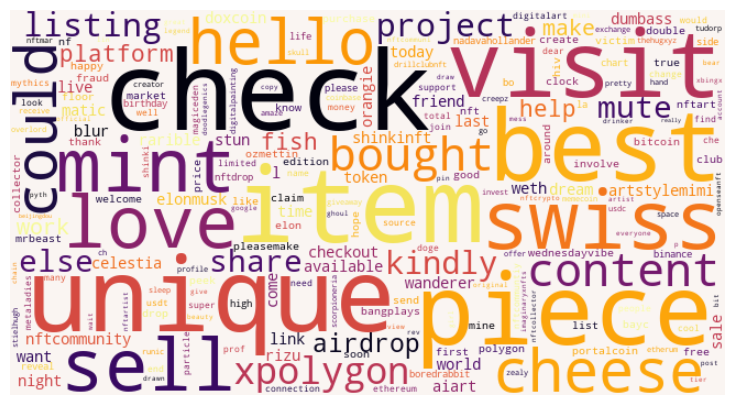

In [165]:
from wordcloud import WordCloud
wordcloud = WordCloud(stopwords=stop_list, background_color='#faf5f2', width=650, height=350, max_font_size=100, max_words=220, colormap="inferno", collocations=False,  normalize_plurals=False).generate(texto)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()